# Experiments with HSV Color Spaces

The previous Filtering and Border Extraction tests have been done mostly in Greyscale, only using differences in brightness of pixels to isolate regions of interest. Differences in color are not accounted for. It would seem like the color information could be very usefull, however working in RGB space is unintuitive. Let convert to HSV color space and see what sorts of groupings might be possible. 

In [1]:
%matplotlib notebook
# %matplotlib inline

import os
from PIL import Image
from numpy import *
from pylab import *

all_images = []
all_image_root = 'PH2Dataset/PH2 Dataset images'

#gather all images in all_image_root and store them in all_images
def gather_images():
    for dirpath, dirnames, filenames in os.walk(all_image_root):
        for filename in [f for f in filenames if ( f.endswith(".bmp") and "_" not in f  )]:
            all_images.append(os.path.join(dirpath, filename))

gather_images()

## Little 3d plotting Test to get started

<IPython.core.display.Javascript object>


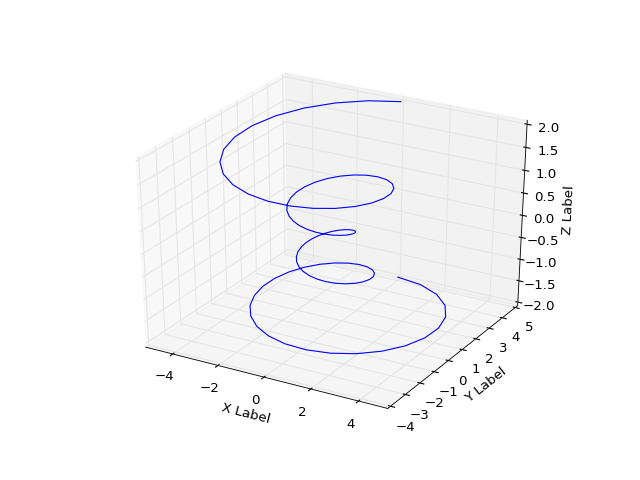

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

theta = np.linspace(-4 * np.pi, 4 * np.pi, 100) # prepare 100 theta angle values
z = np.linspace(-2, 2, 100)                     # prepare 100 z (height) values
r = z**2 + 1                                    # 100 radius values
x = r * np.sin(theta)                           # calculate 100 x values from the radii and thetas
y = r * np.cos(theta)                           # calculate 100 y values from the radii and thetas
ax.plot(x, y, z, label='parametric curve')      # put the x, y, z values all together and plot

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

show()


# Plot a couple of RGB Pixels in HSV Space

HSV stands for Hue, Saturation, Value. 
Hue is measured in degrees going from 0° = Red, 120° = Green, 240° = Blue and back to 360° = Red
The Hue can be undefined when the Saturation is 0, meaning that a pixel has no color value.


In [3]:
from matplotlib.colors import rgb_to_hsv

red_pixel_rgb = [1.0, 0.0, 0.0]
green_pixel_rgb = [0.0, 1.0, 0.0]
blue_pixel_rgb = [0.0, 0.0, 1.0]

pixels = array([red_pixel_rgb, green_pixel_rgb, blue_pixel_rgb])

print(rgb_to_hsv(pixels))

[[ 0.          1.          1.        ]
 [ 0.33333333  1.          1.        ]
 [ 0.66666667  1.          1.        ]]


Ok, Matplotlib uses float values for H, from 0.0 to 1.0

Lets, plot the 3 points in 3d space, use the color of the pixel as the pixel's color.

<IPython.core.display.Javascript object>


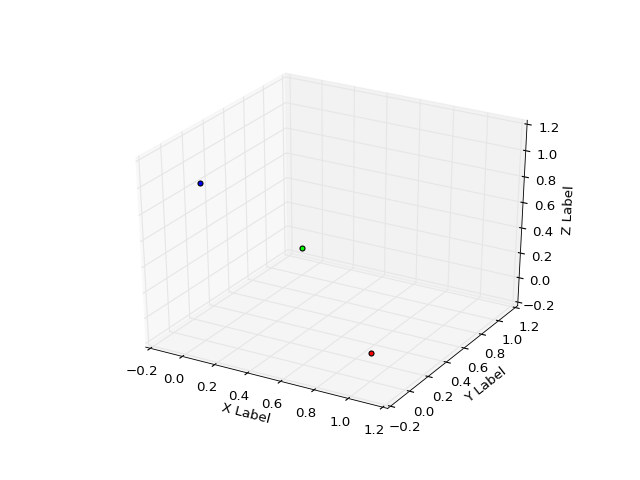

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# loop through pixels array and add each pixel as item in scatter plot
for pixel in pixels:
    x = pixel[0]
    y = pixel[1]
    z = pixel[2]
    color = pixel
    marker = 'o'
    
    ax.scatter(x,y,z,c=color,marker=marker)
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

Ok, but that is not HSV space yet.
We need to map the rgb pixel coordinates to HSV space.
* Z Coordinate will be V ( lightness / darkness of pixel ):
* X is cos(H * pi) * S
* Y is sin(-H * pi) * S

Let's try again:

<IPython.core.display.Javascript object>


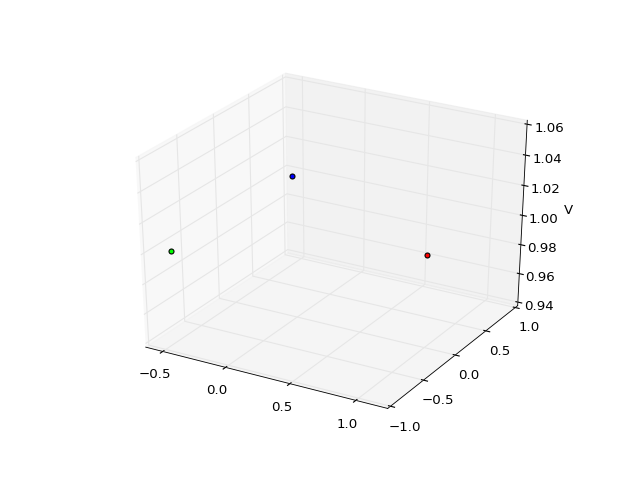

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# loop through pixels array and add each pixel as item in scatter plot
for pixel in pixels:
    [(H, S, V)] =  rgb_to_hsv([pixel]) # convert to H,S,V
    x = cos(H*2*pi) * S
    y = sin(-H*2*pi) * S
    z = V
    color = pixel
    marker = 'o'
    
    ax.scatter(x,y,z,c=color,marker=marker)
    
ax.set_zlabel('V')

plt.show()

Hard to tell what it going on. Let's make a whole bunch of Pixels.

<IPython.core.display.Javascript object>


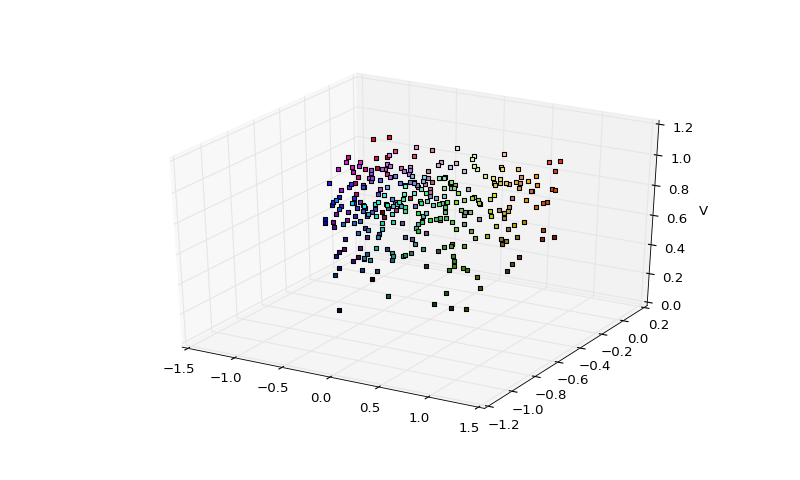

In [84]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')


many_pixels = np.random.rand(300,3)

# loop through pixels array and add each pixel as item in scatter plot
for pixel in many_pixels:
    [(H, S, V)] =  rgb_to_hsv([pixel]) # convert to H,S,V
    x = cos(H*pi) * S
    y = sin(-H * pi) * S
    z = V
    color = pixel
    marker = ','
    
    ax.scatter(x,y,z,c=color, marker=marker)
    
ax.set_zlabel('V')

plt.show()

Nicer!
Now, if we change the opacity of the pixels, might be nice to visualize spread and density. More of a volumentric effect:

<IPython.core.display.Javascript object>


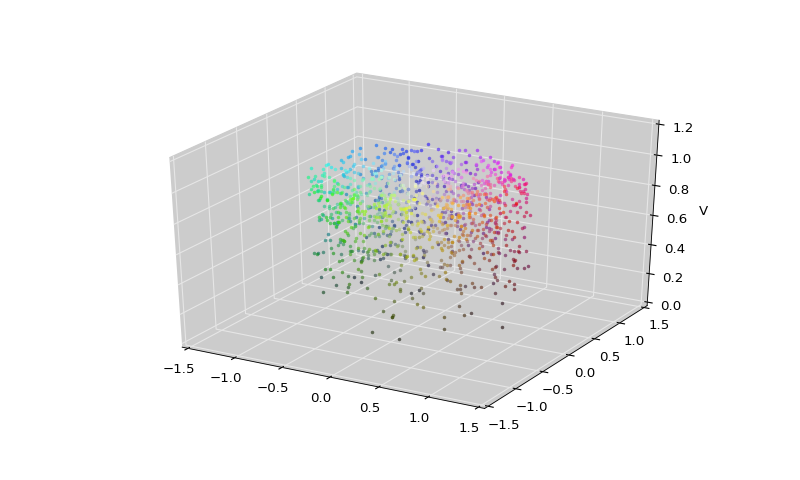

In [85]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')


many_pixels = np.random.rand(1200,3)
X = []
Y = []
Z = []

# loop through pixels array and add each pixel as item in scatter plot
for pixel in many_pixels:
    [(H, S, V)] =  rgb_to_hsv([pixel]) # convert to H,S,V
    x = cos(H*2*pi) * S
    y = sin(-H*2*pi) * S
    z = V
    color = pixel
    marker = ','
    X.append(x)
    Y.append(y)
    Z.append(z)
    
    ax.scatter(x,y,z,c=color, s=10, lw = 0, alpha=0.6)
 
ax.set_zlabel('V')
ax.w_xaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
ax.w_yaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
ax.w_zaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))

plt.show()

# Plot an image in 3d HSV Space

<IPython.core.display.Javascript object>


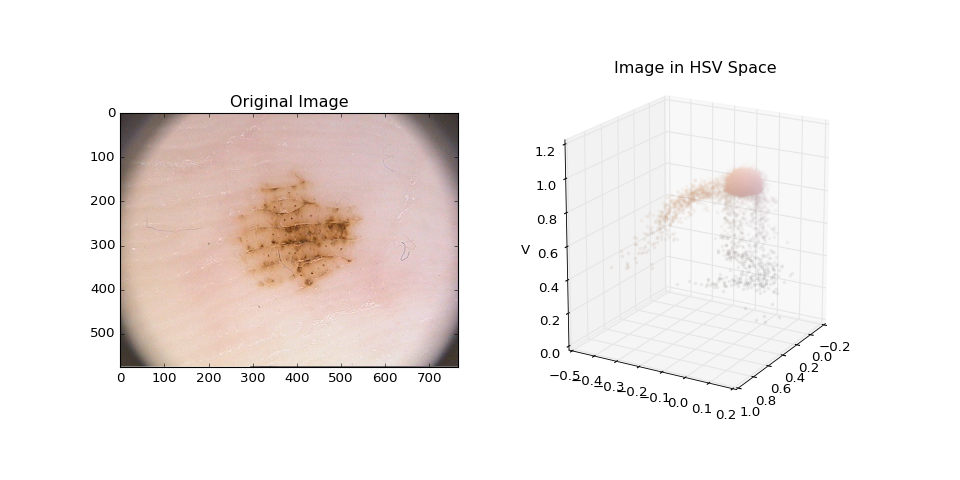

In [86]:
import colorsys 
from skimage.color import rgb2hsv

def transform_to_hsv_space(im):

    fig = plt.figure(figsize=(12, 6))

    ax = fig.add_subplot(121)
    ax.imshow(im)
    ax.set_title('Original Image')

    ax = fig.add_subplot(122, projection='3d')

    #im = rgb2hsv(im)
    index = 0

    # loop through pixels array and add each pixel as item in scatter plot
    for row in im:
        for pixel in row:
            index = index + 1
            if index % 80 > 0:
                continue
            [[(H, S, V)]] =  rgb2hsv([[pixel]])
            x = cos(H*2*pi) * S
            y = sin(-H*2*pi) * S
            z = V
            color = (pixel[0]/255.,pixel[1]/255.,pixel[2]/255.)
            marker = ','

            ax.scatter(x,y,z,c=color, s=10, lw = 0, alpha=0.08)
    ax.set_zlabel('V')
    ax.view_init(elev=17., azim=30)
    ax.set_title('Image in HSV Space')
    plt.show()
    
im = array(Image.open(all_images[4]))

transform_to_hsv_space(im)


Wow! A distinct skin colored blob with a tail like a commet. It is showering pixels down into the darker regions towards the bottom ( corresponds to the black edges of the image ). It would be interesting to find out what the tail and blob correspond to in the original image.

Let's try some more..

<IPython.core.display.Javascript object>


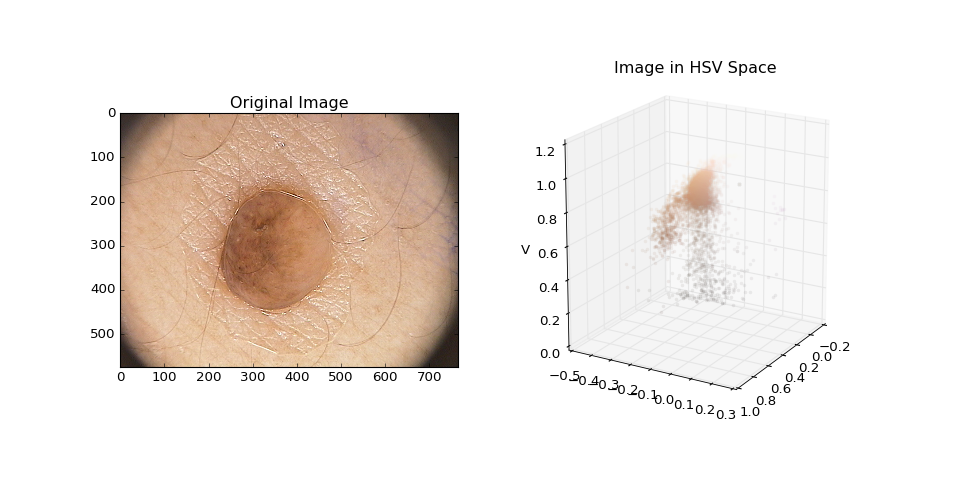

<IPython.core.display.Javascript object>


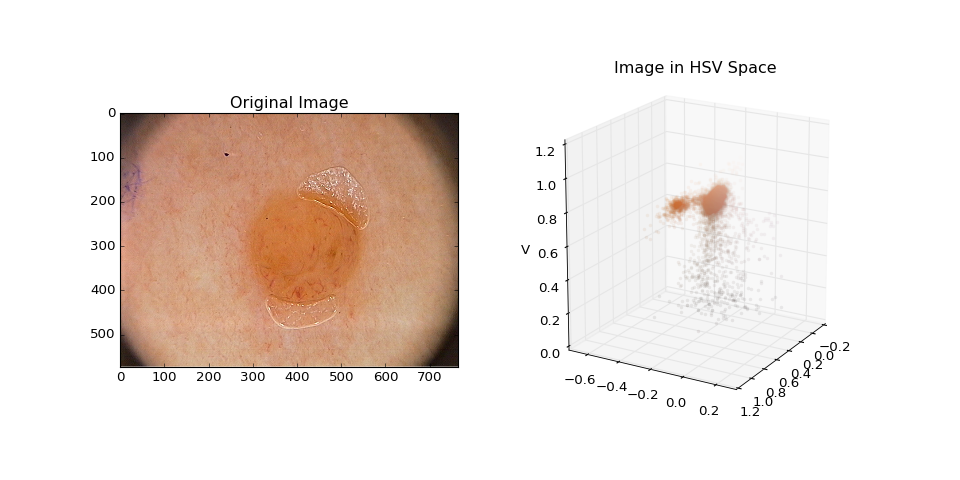

<IPython.core.display.Javascript object>


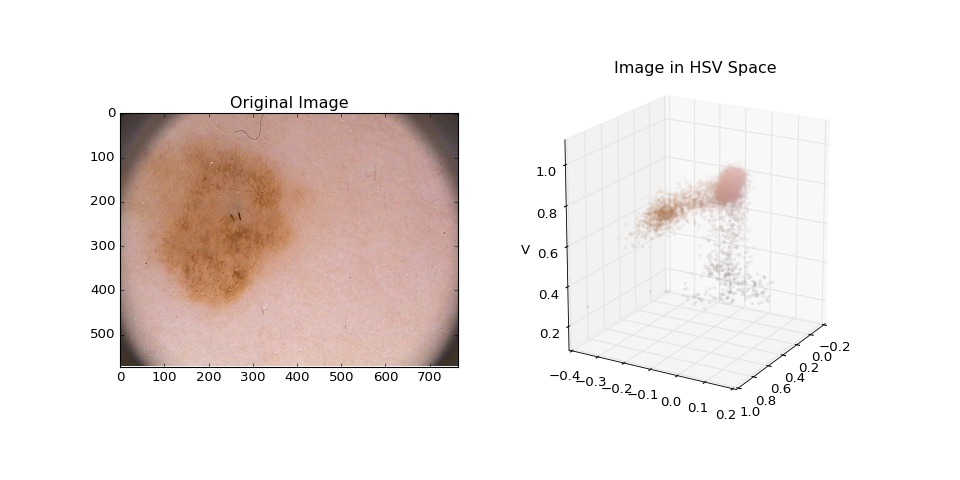

<IPython.core.display.Javascript object>


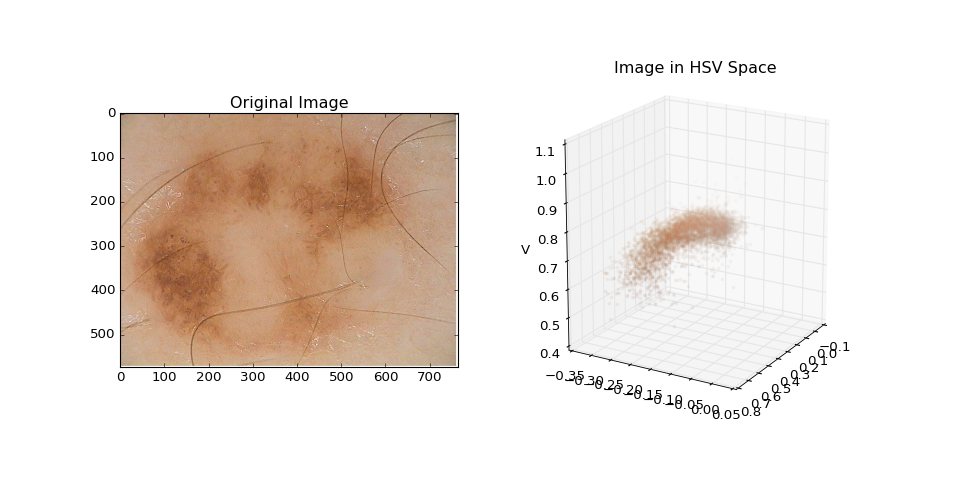

In [87]:
for i in range(4):
    im = array(Image.open(all_images[5+i]))
    transform_to_hsv_space(im)

More commet tails.


Without color information all the pixels would lie on a vertical line with bright pixels at the top and darker pixels towards the bottom. It seems to me that the color information could be valuable during segmentation. In the 3d view, height differences correspond to the brightness, horizontal displacement will correspond to either saturation or hue.

![alt text](https://raw.githubusercontent.com/alexgustafson/BATests/master/SavedImages/HSV_Selection.png "Visualisation in Blender 3d")

# Histogram of Hue/Saturation Values - not finished!


<IPython.core.display.Javascript object>


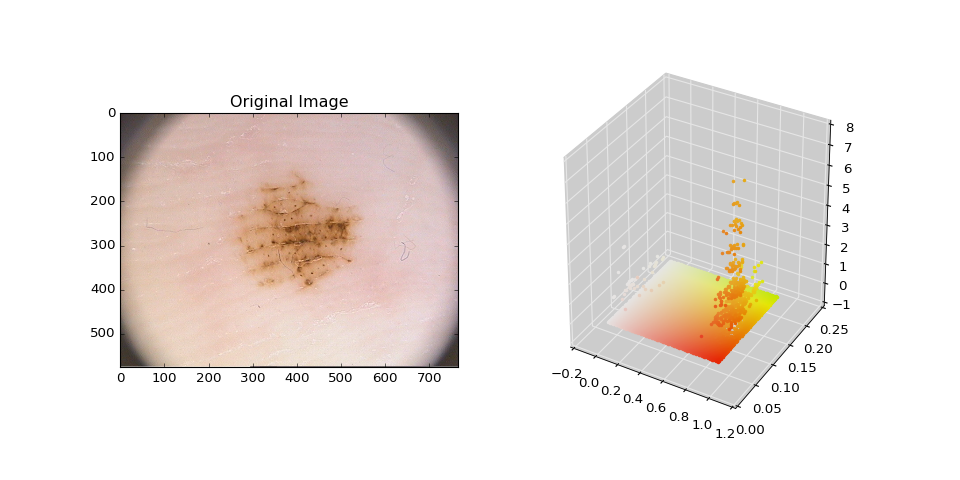

In [88]:
import colorsys 
from skimage.color import rgb2hsv
from itertools import product

def hue_histogram(image):

    fig = plt.figure(figsize=(12, 6))
    (R,G,B) = (0,1,2)
    bins = 100

    ax = fig.add_subplot(121)
    ax.imshow(image)
    ax.set_title('Original Image')

    ax = fig.add_subplot(122, projection='3d')
    colors = []
    
    for row in image:
        for pixel in row:
            [r,g,b] = pixel
            colors.append( ([r/255.,g/255.,b/255.]) )
     
    colors = array(colors).reshape(image.shape)
    hsv = rgb2hsv(colors)

    H, xedges, yedges = np.histogram2d(hsv[:, :, 0][0], hsv[:, :, 1][0], bins=bins)
    i = 0
    j = 0

    for x in xedges[1:]:
        j = 0
        for y in yedges[5:]:
            color = colorsys.hsv_to_rgb(y,x,0.9)
            ax.scatter(x,y,H[i][j],c=color, s=10, lw = 0, alpha=1.0)
            j = j + 1
            
        i = i + 1

    ax.w_xaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
    ax.w_yaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
    ax.w_zaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
    plt.show()
    
    
im = array(Image.open(all_images[4]))

hue_histogram(im)


# Examine HSV Channels

<IPython.core.display.Javascript object>


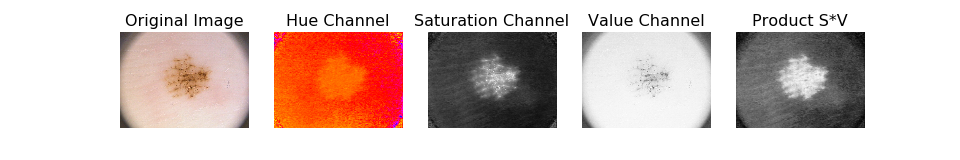

<IPython.core.display.Javascript object>


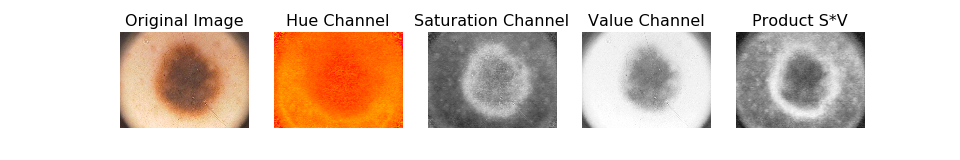

<IPython.core.display.Javascript object>


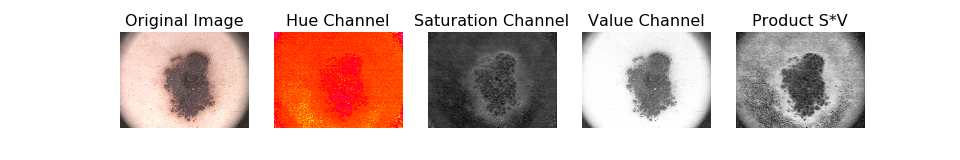

<IPython.core.display.Javascript object>


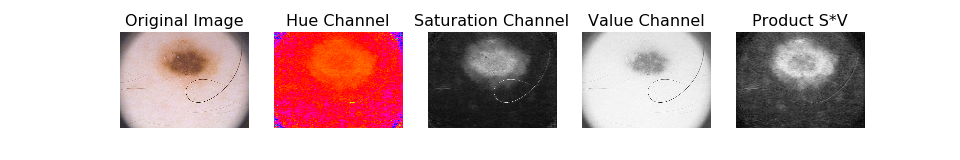

<IPython.core.display.Javascript object>


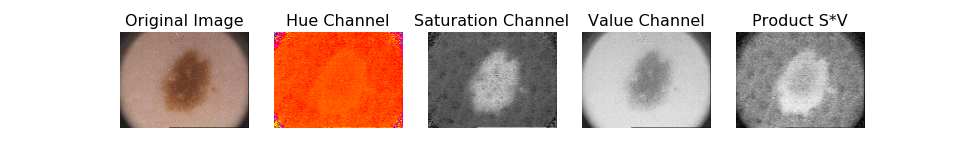

<IPython.core.display.Javascript object>


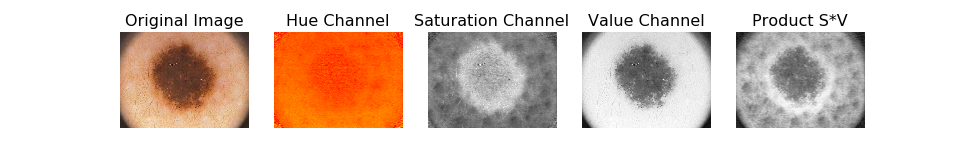

In [7]:
from skimage.color import rgb2hsv


def split_hsv(im):
    fig = plt.figure(figsize=(12, 2))

    (H,S,V) = (0,1,2)
    hsv = rgb2hsv(im)

    ax = fig.add_subplot(151)
    ax.axis('off')
    ax.imshow(im)
    ax.set_title('Original Image')

    ax = fig.add_subplot(152)
    ax.axis('off')
    ax.imshow(hsv[:,:,H], cmap='hsv')
    ax.set_title('Hue Channel')

    ax = fig.add_subplot(153)
    ax.axis('off')
    ax.imshow(hsv[:,:,S], cmap='Greys_r')
    ax.set_title('Saturation Channel')

    ax = fig.add_subplot(154)
    ax.axis('off')
    ax.imshow(hsv[:,:,V], cmap='Greys_r')
    ax.set_title('Value Channel')
    plt.show()

    ax = fig.add_subplot(155)
    ax.axis('off')
    ax.imshow(hsv[:,:,V] * hsv[:,:,S] , cmap='Greys_r')
    ax.set_title('Product S*V')
    plt.show()
    
    
split_hsv(array(Image.open(all_images[4])))
split_hsv(array(Image.open(all_images[164])))
split_hsv(array(Image.open(all_images[48])))
split_hsv(array(Image.open(all_images[76])))

split_hsv(array(Image.open(all_images[19])))
split_hsv(array(Image.open(all_images[32])))

